## Gira análise

In [132]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm

from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
#cleaned dataset with the selected variables
df = pd.read_csv('GIRA_stations_2020_v2.csv',sep=",")

In [3]:
df.head()

,OID_,id_station,desigcomercial,near_attractions,near_rest_cafe_bar,NEAR_metro_station,near_train_station,near_university,near_secondary_school,near_local_accomodation,...,PopDensity,GreenAreaPer,near_seaside,AltitudeLx,MEAN_slope,COUNT_rest_cafe_bar_,COUNT_bus_stops_,COUNT_attractions_monuments_,Lat,Long
0,1,486,486 - Rua Hermano Neves / Rua José Escada,728.542792,31.289487,299.339510,2161.212988,789.319440,193.544039,85.708212,...,10.380559,6.447754,390.961972,98.089684,2.106925,3.0,3.0,0.0,38.759540,-9.169850
1,2,485,485 - Rua Tomás da Fonseca / Rua António Albin...,771.484800,19.834138,537.142756,1774.225755,773.038903,460.544917,78.128199,...,14.597997,0.090993,601.411186,94.967122,2.107057,4.0,6.0,0.0,38.756000,-9.170000
2,3,412,412 - Av. Ressano Garcia / Av. António Augusto...,106.975346,16.824506,67.020535,1208.449521,538.925348,636.726687,26.865038,...,6.864289,15.915481,215.903094,81.065688,3.607884,19.0,6.0,1.0,38.734480,-9.154600
3,4,216,216 - Praça D. Luís I,52.317955,44.016906,63.730090,213.578723,337.971312,152.281291,83.760396,...,2.763708,0.000000,181.030197,3.185669,1.324241,55.0,8.0,2.0,38.706630,-9.146550
4,5,107,107 - Rotunda dos Vice-Reis,404.672048,109.288173,653.340543,806.940960,296.719193,1223.225136,128.644205,...,4.785665,0.000000,297.749605,8.381698,1.886922,9.0,5.0,0.0,38.774505,-9.095416


In [4]:
df.describe()

,OID_,id_station,near_attractions,near_rest_cafe_bar,NEAR_metro_station,near_train_station,near_university,near_secondary_school,near_local_accomodation,near_touristic_establishments,...,PopDensity,GreenAreaPer,near_seaside,AltitudeLx,MEAN_slope,COUNT_rest_cafe_bar_,COUNT_bus_stops_,COUNT_attractions_monuments_,Lat,Long
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,42.500000,350.750000,234.156408,97.906422,400.942041,988.694558,557.186139,449.164971,89.519063,403.516456,...,7.658149,4.971843,424.492942,56.789178,2.416846,14.892857,6.464286,2.250000,38.744162,-9.139043
std,24.392622,136.268859,225.131796,77.852857,347.259755,609.590305,383.662539,361.080565,98.806650,426.936765,...,4.702795,7.621019,269.145162,35.366303,1.713282,18.000012,3.897625,2.882749,0.020414,0.021430
min,1.000000,101.000000,7.711863,9.751989,15.247620,46.505718,53.289353,5.768629,8.807085,21.339925,...,0.026886,0.000000,18.037545,2.079713,0.426142,0.000000,0.000000,0.000000,38.705230,-9.178490
25%,21.750000,221.250000,84.364740,48.547167,167.442569,567.582043,293.828413,191.923522,34.759779,94.115936,...,4.177213,0.000000,193.993477,10.729426,1.370517,3.000000,4.000000,0.000000,38.734302,-9.149495
50%,42.500000,416.500000,155.183574,80.754236,298.807585,914.073160,481.763174,356.829446,68.060085,234.539126,...,7.564274,0.050503,386.833824,74.766276,1.895720,9.000000,6.000000,1.000000,38.744035,-9.144585
75%,63.250000,457.500000,307.554688,122.143854,537.282084,1242.329557,723.150937,565.300175,100.432967,633.058453,...,10.424276,8.988890,606.904442,81.975518,2.754242,19.250000,9.000000,3.000000,38.757932,-9.136710
max,84.000000,490.000000,1345.195519,473.720675,2056.870108,2797.233817,1883.731581,1465.735396,571.970648,2106.012096,...,22.306924,35.433828,1045.284871,106.396363,9.275259,102.000000,17.000000,15.000000,38.793000,-9.092350


In [5]:
df.columns

Index(['OID_', 'id_station', 'desigcomercial', 'near_attractions',
       'near_rest_cafe_bar', 'NEAR_metro_station', 'near_train_station',
       'near_university', 'near_secondary_school', 'near_local_accomodation',
       'near_touristic_establishments', 'near_parks', 'pSUM_N_ALOJAMENTOS',
       'pSUM_N_INDIVIDUOS_RESIDENT', 'cycling_lane', 'Average_of_temp',
       'Average_of_MEAN_ratio', 'Average_of_COUNT_trip_start',
       'Average_of_MEAN_numbicicletas', 'Average_of_hum', 'Average_of_precip',
       'Average_of_sun', 'near_bus_stops', 'near_pier_stations',
       'COUNT_train_stops', 'COUNT_metro_stops', 'PopDensity', 'GreenAreaPer',
       'near_seaside', 'AltitudeLx', 'MEAN_slope', 'COUNT_rest_cafe_bar_',
       'COUNT_bus_stops_', 'COUNT_attractions_monuments_', 'Lat', 'Long'],
      dtype='object')

In [59]:
# #Keep the important collumns
# df = df.iloc[: , -36:]
# df

,9.3.3.1 Desembocaduras fluviais,id_station,desigcomercial,num_docas,cycling_lane,Average_of_temp,Average_of_MEAN_ratio,Average_of_COUNT_trip_start,Average_of_MEAN_numbicicletas,Average_of_hum,...,near_rest_cafe_bar,NEAR_metro_station,near_train_station,near_university,near_secondary_school,near_local_accomodation,near_touristic_establishments,near_parks,pSUM_N_ALOJAMENTOS,pSUM_N_INDIVIDUOS_RESIDENT
0,0.000000,486,Rua Hermano Neves / Rua José Escada,14,789.799645,16.932776,44.097290,7.826379,6.173621,72.783698,...,31.289487,299.339510,2161.212988,789.319440,193.544039,85.708212,1174.482963,137.206174,1116.620472,2103.962695
1,0.000000,485,Rua Tomás da Fonseca / Rua António Albino Machado,10,893.186747,16.932776,57.831094,4.216891,5.783109,72.783698,...,19.834138,537.142756,1774.225755,773.038903,460.544917,78.128199,1012.900199,227.402359,1352.277474,2958.765725
2,0.000000,412,Av. Ressano Garcia / Av. António Augusto de Ag...,16,1362.293724,17.200820,31.675169,10.931973,5.068027,73.940005,...,16.824506,67.020535,1208.449521,538.925348,636.726687,26.865038,242.165440,103.899618,939.215088,1391.274575
3,0.026891,216,Praça D. Luís I,21,961.423679,17.200820,24.927592,15.765206,5.234794,73.940005,...,44.016906,63.730090,213.578722,337.971312,152.281291,83.760396,286.563113,9.167417,432.297209,560.156671
4,0.000000,107,Rotunda dos Vice-Reis,14,911.570072,16.932776,37.925395,8.690445,5.309555,72.783698,...,109.288173,653.340543,806.940960,296.719193,1223.225136,128.644205,278.697497,74.776625,796.018920,969.973000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.000000,471,Rua Lopes de Mendonça / EB São João de Brito,10,418.516622,16.932776,43.680081,5.631992,4.368008,72.783698,...,110.167016,689.786210,1212.102062,856.530057,203.935181,175.902908,1171.879407,183.553274,1149.638332,1922.543196
80,0.000000,419,Av. António José de Almeida / Instituto Superi...,25,215.404204,17.200820,47.322784,13.169304,11.830696,73.940005,...,126.266784,599.185001,902.672719,189.416129,187.061971,116.313739,156.867926,204.777531,666.936968,1196.199191
81,0.000000,430,Av. Barbosa Du Bocage / Rua Arco do Cego,20,2425.482383,17.200820,39.009373,12.198125,7.801875,73.940005,...,100.420128,291.980005,624.653678,485.649672,246.827558,14.052710,143.328836,15.709935,1241.205927,1921.760026
82,0.000000,450,Rua Alfredo Cortês,10,409.292449,16.932776,46.102952,5.389705,4.610295,72.783698,...,58.847996,309.529423,450.318944,649.090891,544.647162,41.154126,299.625619,316.870313,1590.830058,2622.006433


In [6]:
# names of collumns to list
df.columns.tolist()

['OID_',
 'id_station',
 'desigcomercial',
 'near_attractions',
 'near_rest_cafe_bar',
 'NEAR_metro_station',
 'near_train_station',
 'near_university',
 'near_secondary_school',
 'near_local_accomodation',
 'near_touristic_establishments',
 'near_parks',
 'pSUM_N_ALOJAMENTOS',
 'pSUM_N_INDIVIDUOS_RESIDENT',
 'cycling_lane',
 'Average_of_temp',
 'Average_of_MEAN_ratio',
 'Average_of_COUNT_trip_start',
 'Average_of_MEAN_numbicicletas',
 'Average_of_hum',
 'Average_of_precip',
 'Average_of_sun',
 'near_bus_stops',
 'near_pier_stations',
 'COUNT_train_stops',
 'COUNT_metro_stops',
 'PopDensity',
 'GreenAreaPer',
 'near_seaside',
 'AltitudeLx',
 'MEAN_slope',
 'COUNT_rest_cafe_bar_',
 'COUNT_bus_stops_',
 'COUNT_attractions_monuments_',
 'Lat',
 'Long']

In [22]:
#inlcude after 'desigcomercial',
df = df[['cycling_lane',
 'Average_of_temp',
 'Average_of_MEAN_ratio',
 'Average_of_MEAN_numbicicletas',
 'Average_of_hum',
 'Average_of_precip',
 'Average_of_sun',
 'near_bus_stops',
 'near_pier_stations',
 'COUNT_train_stops',
 'COUNT_metro_stops',
 'PopDensity',
 'GreenAreaPer',
 'near_seaside',
 'AltitudeLx',
 'MEAN_slope',
 'COUNT_rest_cafe_bar_',
 'COUNT_bus_stops_',
 'COUNT_attractions_monuments_',
 'near_attractions',
 'near_rest_cafe_bar',
 'NEAR_metro_station',
 'near_train_station',
 'near_university',
 'near_secondary_school',
 'near_local_accomodation',
 'near_touristic_establishments',
 'near_parks',
 'pSUM_N_ALOJAMENTOS',
 'pSUM_N_INDIVIDUOS_RESIDENT']]

In [8]:
df.describe()

,cycling_lane,Average_of_temp,Average_of_MEAN_ratio,Average_of_COUNT_trip_start,Average_of_MEAN_numbicicletas,Average_of_hum,Average_of_precip,Average_of_sun,near_bus_stops,near_pier_stations,...,near_rest_cafe_bar,NEAR_metro_station,near_train_station,near_university,near_secondary_school,near_local_accomodation,near_touristic_establishments,near_parks,pSUM_N_ALOJAMENTOS,pSUM_N_INDIVIDUOS_RESIDENT
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1022.145928,17.066798,40.876086,11.033083,7.395489,73.361851,0.048105,722.618629,88.713147,4429.131816,...,97.906422,400.942041,988.694558,557.186139,449.164971,89.519063,403.516456,133.947665,981.640276,1552.176595
std,723.761599,0.134827,9.373994,5.353474,3.499618,0.581626,0.001666,18.297037,76.203706,2384.267817,...,77.852857,347.259755,609.590305,383.662539,361.080565,98.806650,426.936765,114.369655,567.646726,953.176460
min,0.000000,16.932776,12.103581,4.216891,1.694501,72.783698,0.046448,704.430829,9.847895,142.358039,...,9.751989,15.247620,46.505718,53.289353,5.768629,8.807085,21.339925,0.000000,4.210681,5.449235
25%,513.964973,16.932776,34.894971,7.371392,5.202469,72.783698,0.046448,704.430829,36.868380,3205.085664,...,48.547167,167.442569,567.582043,293.828413,191.923522,34.759779,94.115936,30.179453,500.130603,846.649988
50%,891.314223,17.066798,42.613172,9.950469,6.611415,73.361851,0.048105,722.618629,63.348146,4268.577404,...,80.754236,298.807585,914.073160,481.763174,356.829446,68.060085,234.539126,117.819737,983.822119,1533.149742
75%,1338.450747,17.200820,47.285162,13.600879,8.312367,73.940005,0.049761,740.806430,117.291729,5989.500120,...,122.143854,537.282084,1242.329557,723.150937,565.300175,100.432967,633.058453,213.417614,1264.569222,2112.823448
max,3167.758757,17.200820,60.850742,32.454064,21.605096,73.940005,0.049761,740.806430,480.839212,10030.814930,...,473.720675,2056.870108,2797.233817,1883.731581,1465.735396,571.970648,2106.012096,545.596072,2350.045285,4521.234093


# Descriptive statistics

In [9]:
descriptives = np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']]
descriptives

,count,mean,std,min,max
cycling_lane,84.0,1022.15,723.76,0.00,3167.76
Average_of_temp,84.0,17.07,0.13,16.93,17.20
Average_of_MEAN_ratio,84.0,40.88,9.37,12.10,60.85
Average_of_COUNT_trip_start,84.0,11.03,5.35,4.22,32.45
Average_of_MEAN_numbicicletas,84.0,7.40,3.50,1.69,21.61
Average_of_hum,84.0,73.36,0.58,72.78,73.94
Average_of_precip,84.0,0.05,0.00,0.05,0.05
Average_of_sun,84.0,722.62,18.30,704.43,740.81
near_bus_stops,84.0,88.71,76.20,9.85,480.84
near_pier_stations,84.0,4429.13,2384.27,142.36,10030.81


In [24]:
#export summary statistics table
np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_csv('summary stats.csv', sep=',')

In [10]:
kurtosis = df.kurtosis()

In [2]:
skew = df.skew()

NameError: name 'df' is not defined

In [12]:
df_row = pd.concat([kurtosis,skew], axis=1)



In [13]:
df_row

,0,1
cycling_lane,1.192314,1.189998e+00
Average_of_temp,-2.049383,0.000000e+00
Average_of_MEAN_ratio,0.041543,-3.924120e-01
Average_of_COUNT_trip_start,3.343154,1.585785e+00
Average_of_MEAN_numbicicletas,5.438984,2.064559e+00
Average_of_hum,-2.049383,-1.126099e-13
Average_of_precip,-2.049383,0.000000e+00
Average_of_sun,-2.049383,9.576672e-15
near_bus_stops,7.779942,2.257839e+00
near_pier_stations,-0.434744,1.709960e-01


In [14]:
pd.concat([descriptives,df_row], axis=1)

,count,mean,std,min,max,0,1
cycling_lane,84.0,1022.15,723.76,0.00,3167.76,1.192314,1.189998e+00
Average_of_temp,84.0,17.07,0.13,16.93,17.20,-2.049383,0.000000e+00
Average_of_MEAN_ratio,84.0,40.88,9.37,12.10,60.85,0.041543,-3.924120e-01
Average_of_COUNT_trip_start,84.0,11.03,5.35,4.22,32.45,3.343154,1.585785e+00
Average_of_MEAN_numbicicletas,84.0,7.40,3.50,1.69,21.61,5.438984,2.064559e+00
Average_of_hum,84.0,73.36,0.58,72.78,73.94,-2.049383,-1.126099e-13
Average_of_precip,84.0,0.05,0.00,0.05,0.05,-2.049383,0.000000e+00
Average_of_sun,84.0,722.62,18.30,704.43,740.81,-2.049383,9.576672e-15
near_bus_stops,84.0,88.71,76.20,9.85,480.84,7.779942,2.257839e+00
near_pier_stations,84.0,4429.13,2384.27,142.36,10030.81,-0.434744,1.709960e-01


# Correlations

In [44]:
correlations = df.corr()['Average_of_MEAN_ratio'][:]
correlations = pd.DataFrame(correlations)
correlations.sort_values(by=['Average_of_MEAN_ratio'])

,Average_of_MEAN_ratio
COUNT_rest_cafe_bar_,-0.318138
COUNT_metro_stops,-0.297604
Average_of_sun,-0.245570
Average_of_precip,-0.245570
Average_of_temp,-0.245570
Average_of_hum,-0.245570
COUNT_train_stops,-0.167085
near_local_accomodation,-0.158859
cycling_lane,-0.142178
COUNT_attractions_monuments_,-0.136820


In [10]:
#export descriptive table
correlations.to_csv('correlations.csv', sep=',')

In [67]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["Average_of_MEAN_ratio"])

#Selecting highly correlated features
relevant_featuresPositive = cor_target[cor_target>0.3]
relevant_featuresPositive



Average_of_MEAN_ratio            1.000000
Average_of_MEAN_numbicicletas    0.347476
PopDensity                       0.468078
COUNT_rest_cafe_bar_             0.318138
pSUM_N_ALOJAMENTOS               0.395125
pSUM_N_INDIVIDUOS_RESIDENT       0.468078
Name: Average_of_MEAN_ratio, dtype: float64

In [68]:
relevant_featuresNegative = cor_target[cor_target>-0.3]
relevant_featuresNegative

cycling_lane                     0.142178
Average_of_temp                  0.245570
Average_of_MEAN_ratio            1.000000
Average_of_MEAN_numbicicletas    0.347476
Average_of_hum                   0.245570
Average_of_precip                0.245570
Average_of_sun                   0.245570
near_bus_stops                   0.096566
near_pier_stations               0.208786
COUNT_train_stops                0.167085
COUNT_metro_stops                0.297604
PopDensity                       0.468078
GreenAreaPer                     0.260197
near_seaside                     0.201338
AltitudeLx                       0.283979
MEAN_slope                       0.005460
COUNT_rest_cafe_bar_             0.318138
COUNT_bus_stops_                 0.037406
COUNT_attractions_monuments_     0.136820
near_attractions                 0.207673
near_rest_cafe_bar               0.030611
NEAR_metro_station               0.179877
near_train_station               0.077929
near_university                  0

<AxesSubplot:>

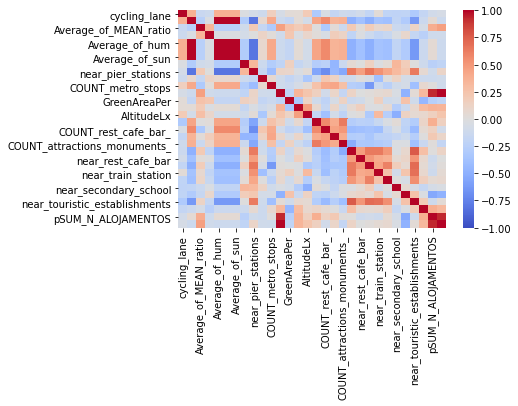

In [28]:
sns.heatmap(df.corr(),vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [55]:
#selection of the high correlated variabels
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

pd.DataFrame(sol)

0
Average_of_temp    Average_of_sun                 1.000000
                   Average_of_precip              1.000000
Average_of_hum     Average_of_sun                 1.000000
                   Average_of_precip              1.000000
Average_of_temp    Average_of_hum                 1.000000
...                                                    ...
near_rest_cafe_bar pSUM_N_INDIVIDUOS_RESIDENT     0.004094
PopDensity         near_rest_cafe_bar             0.004094
near_bus_stops     near_touristic_establishments  0.004072
COUNT_bus_stops_   near_parks                     0.002720
near_bus_stops     near_rest_cafe_bar             0.001930

[435 rows x 1 columns]

In [79]:
#Backward Elimination
cols = list(df.columns)
y = df["Average_of_MEAN_ratio"]
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Average_of_MEAN_ratio', 'PopDensity', 'pSUM_N_INDIVIDUOS_RESIDENT']


## Selecting the important variables to the next steps

High correlated variables with the dependent variable, values higher than 0,20:<br>
COUNT_rest_cafe_bar_	-0.318138 <br>
COUNT_metro_stops	-0.297604 <br>

near_seaside	0.201338 <br>
near_attractions	0.207673 <br>
near_pier_stations	0.208786 <br>
GreenAreaPer	0.260197 <br>
AltitudeLx	0.283979 <br>
Average_of_MEAN_numbicicletas	0.347476 <br>
pSUM_N_ALOJAMENTOS	0.395125 <br>
pSUM_N_INDIVIDUOS_RESIDENT	0.468078 <br>
PopDensity	0.468078 <br>

In [92]:
#selected variables to regressions
df_regression = df[["COUNT_rest_cafe_bar_","COUNT_metro_stops","near_seaside","near_attractions","near_pier_stations","GreenAreaPer","AltitudeLx","PopDensity"]]
df_regression

,COUNT_rest_cafe_bar_,COUNT_metro_stops,near_seaside,near_attractions,near_pier_stations,GreenAreaPer,AltitudeLx,PopDensity
0,3.0,0.0,390.961972,728.542792,6406.923390,6.447754,98.089684,10.380559
1,4.0,0.0,601.411186,771.484800,6041.914115,0.090993,94.967122,14.597997
2,19.0,1.0,215.903094,106.975346,3359.601961,15.915481,81.065688,6.864289
3,55.0,1.0,181.030197,52.317955,194.936739,0.000000,3.185669,2.763708
4,9.0,0.0,297.749605,404.672048,8181.576083,0.000000,8.381698,4.785665
...,...,...,...,...,...,...,...,...
79,8.0,0.0,722.498728,160.687395,5508.571131,0.000000,87.837932,9.485469
80,5.0,0.0,776.436859,96.765278,3501.332829,1.242895,88.853360,5.901823
81,7.0,0.0,919.055005,61.546937,3858.832640,5.591460,75.103006,9.481605
82,6.0,0.0,807.962429,104.482585,4462.418208,0.000000,88.045719,12.936490


## Regression analysis

In [94]:
y =df['Average_of_MEAN_ratio']
x1 = df_regression

In [95]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Average_of_MEAN_ratio   R-squared:                       0.440
Model:                               OLS   Adj. R-squared:                  0.380
Method:                    Least Squares   F-statistic:                     7.370
Date:                   Fri, 30 Jul 2021   Prob (F-statistic):           3.46e-07
Time:                           13:25:46   Log-Likelihood:                -282.31
No. Observations:                     84   AIC:                             582.6
Df Residuals:                         75   BIC:                             604.5
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   32.6463      4.420      7.387      0.000      23.842      41.451
COUNT_rest_cafe_bar_    -0.0706      0.075     -0.941      0.349      -0.220       0.079
COUNT_metro_stops       -2.9435      1.922     -1.532      0.130      -6.771       0.884
near_seaside             0.0030      0.004      0.742      0.460      -0.005       0.011
near_attractions         0.0082      0.005      1.710      0.091      -0.001       0.018
near_pier_stations      -0.0006      0.001     -1.064      0.291      -0.002       0.001
GreenAreaPer             0.4509      0.127      3.553      0.001       0.198       0.704
AltitudeLx               0.0122      0.031      0.392      0.696      -0.050       0.074
PopDensity               0.9278      0.191      4.859      0.000       0.547       1.308
==============================================================================
Omnibus:                        4.736   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.963
Skew:                          -0.461   Prob(JB):                        0.138
Kurtosis:                       3.530   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
# check multicolienarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df_regression.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,COUNT_rest_cafe_bar_,1.937314
1,COUNT_metro_stops,2.139168
2,near_seaside,5.120483
3,near_attractions,3.739924
4,near_pier_stations,6.079963
5,GreenAreaPer,1.797001
6,AltitudeLx,5.742867


No problems with the VIF values

# Factor analysis

In [101]:
# # Adequacy Test
# Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?".

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity



In [102]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_regression)


In [103]:
chi_square_value,p_value

(208.5608517133753, 7.12709448914332e-30)

In [104]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_regression)
kmo_model
#Value of KMO less than 0.6 is considered inadequate

0.5823212804052423

In [105]:
#Factor analysis
fa = FactorAnalyzer()
fa.fit(df_regression)
eigen_values, vectors = fa.get_eigenvalues()


In [106]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.55996088, 1.75575385, 1.2612969 , 0.81429557, 0.68925202,
       0.40962536, 0.31583615, 0.19397927])

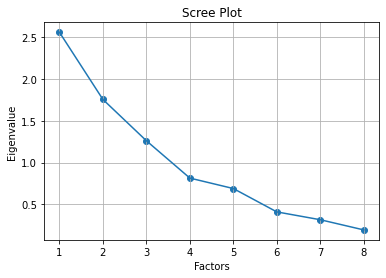

In [107]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_regression.shape[1]+1),ev)
plt.plot(range(1,df_regression.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [130]:
fa = FactorAnalyzer(n_factors=7,rotation='varimax')
fa.fit(df_regression)
factors = pd.DataFrame(fa.loadings_,index=df_regression.columns)
factors

,0,1,2,3,4,5,6
COUNT_rest_cafe_bar_,-0.606953,-0.402117,0.161811,0.362729,0.077862,0.419125,0.006760
COUNT_metro_stops,-0.270424,0.028298,0.095268,0.647180,-0.099813,0.030947,-0.007992
near_seaside,-0.037863,0.620508,0.454714,-0.164861,0.233930,0.062336,0.164609
near_attractions,0.731655,-0.004501,0.155156,-0.119412,0.051475,0.104424,-0.079804
near_pier_stations,0.884873,-0.020281,-0.127617,-0.217852,0.101352,-0.163912,0.099915
GreenAreaPer,-0.016552,0.053283,-0.754973,-0.129315,-0.158181,-0.030746,0.013154
AltitudeLx,0.036617,0.866274,-0.161680,0.104671,0.186492,-0.079023,-0.060783
PopDensity,0.076150,0.212317,0.179149,-0.085920,0.533904,0.009285,0.003651


In [129]:
variance = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
variance

,0,1,2,3,4,5,6
Variance,1.768688,1.346310,0.910603,0.674372,0.428523,0.225557,0.047438
Proportional Var,0.221086,0.168289,0.113825,0.084297,0.053565,0.028195,0.005930
Cumulative Var,0.221086,0.389375,0.503200,0.587497,0.641062,0.669257,0.675186


# Cluster analysis Python